In [21]:
import numpy as np
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.util import invert

from skimage.feature import blob_doh

import matplotlib.pyplot as plt

In [8]:
# read test image
im = imread('/Users/Ankita/Downloads/Flask_parameter_update/static/B4_2_test_500x.tif')
#im = imread('/mnt/data/users/holmlab/datasets/sandia-porosity/Keyence_Microscope_Data/B4_2_test_1500x.tif')

# take patch of image and convert to grayscale
im = im[:1024,:1024]
im = rgb2gray(im)

# prepare an inverted image for comparison
# search for white blobs on black background AND black blobs on white background
imIn = invert(im)

# plt.imshow(im, cmap='gray')

In [24]:
# Initialize and Invoke DoH blob detector
%time blobs_doh = blob_doh(im, overlap=0.5, threshold=0.005, min_sigma=5, max_sigma=50, log_scale=True)

# Plot original image
fig, (ax1, ax2) = plt.subplots(figsize=(16,12), nrows=1, ncols=2)
ax1.imshow(im, cmap='gray')
ax1.set_title('original')
ax2.imshow(im, cmap='gray')
ax2.set_title('with blobs')


# scale blob radii by sqrt(2) to make rings a bit bigger if desired
# radii_doh = blobs_doh[:,2] * np.sqrt(2)
# blobs_doh[:,2] = radii_doh


# Superimpose DoH blobs on image
for blob in blobs_doh:
    y, x, r = blob
    c = plt.Circle((x, y), r, color='g', linewidth=3, fill=False)
    ax2.add_patch(c)

In [ ]:
def blob_detector(imIn, overlap, threshold, min_sigma, max_sigma, log_scale):
    # Initialize and Invoke DoH blob detector
    blobs_doh = blob_doh(imIn, overlap=overlap, threshold=threshold, min_sigma=min_sigma,
                         max_sigma=max_sigma, log_scale=log_scale)
    blobs_y, blobs_x, blobs_r = [],[],[]
    for blob in blobs_doh:
        y, x, r = blob # This code can be made better
        blobs_y.append(y)
        blobs_x.append(x)
        blobs_r.append(r)
    return blobs_y, blobs_x, blobs_r

In [ ]:
from bokeh.io import curdoc
from bokeh.layouts import widgetbox, row, column, gridplot
from bokeh.models import ColumnDataSource, Select, Slider
from bokeh.plotting import figure

In [ ]:
blobs_y, blobs_x, blobs_r = blob_detector(imIn, 0.5,0.005,5,50,True)

source = ColumnDataSource(data=dict(x=blobs_x, y= blobs_y, r=blobs_r))

# create a new plot
s1 = figure(plot_width=250, plot_height=250, title='Original Image')
s1.image(image=[imIn], x=0, y=0, dw=10, dh=10, palette="Greys")

s2 = figure(plot_width=250, plot_height=250, title='With Blobs')
s2.image(image=[imIn], x=0, y=0, dw=10, dh=10, palette="Greys")

CPU times: user 2.47 s, sys: 48 ms, total: 2.52 s
Wall time: 2.52 s


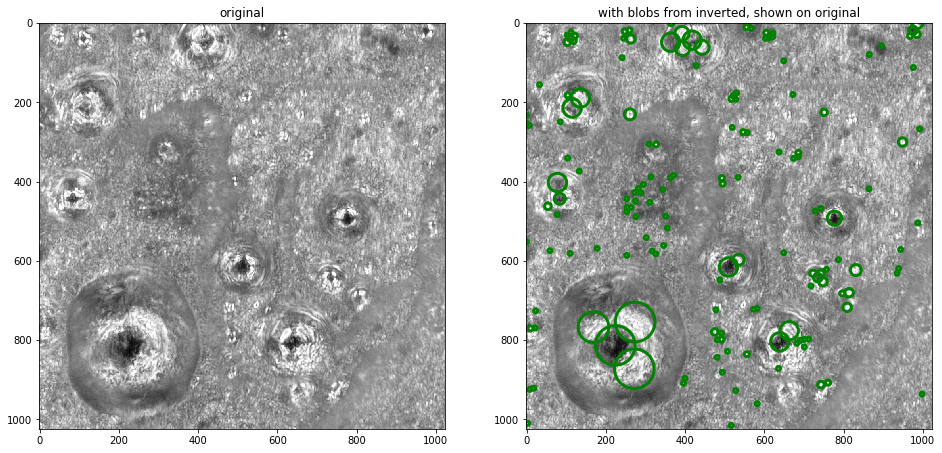

In [27]:
# Initialize and Invoke DoH blob detector
%time blobs_doh = blob_doh(imIn, overlap=0.5, threshold=0.005, min_sigma=5, max_sigma=50, log_scale=True)

# Plot original image
fig, (ax1, ax2) = plt.subplots(figsize=(16,12), nrows=1, ncols=2)
ax1.imshow(im, cmap='gray')
ax1.set_title('original')
ax2.imshow(im, cmap='gray')
ax2.set_title('with blobs from inverted, shown on original')


# scale blob radii by sqrt(2) to make rings a bit bigger if desired
# radii_doh = blobs_doh[:,2] * np.sqrt(2)
# blobs_doh[:,2] = radii_doh


# Superimpose DoH blobs on image
for blob in blobs_doh:
    y, x, r = blob
    c = plt.Circle((x, y), r, color='g', linewidth=3, fill=False)
    ax2.add_patch(c)